In [1]:
def getPitch(pitch):
    return (pitch+6)%12 if pitch%2 == 1 else pitch%12

In [11]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
import numpy as np
 
    
major = [17.7661, 0.145624, 14.9265, 0.160186, 19.8049, 11.3587, 0.281248, 22.062, 0.145624, 8.15494, 0.232998, 4.95122]
minor = [18.2648, 0.737619, 14.0499, 16.8599, 0.702494, 14.4362, 0.702494, 18.6161, 4.56621, 1.93186, 7.37619, 1.75623]
zeros = [0]*11

keys = ['C','G','D','A','E','B','F#','C#','G#','D#','A#', 'F']
# Set data
d={'group': ['C']}
for i in range(12):
    idx = (12 - i + 3)%12
    d[keys[idx]] = minor[getPitch(idx)]
    


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


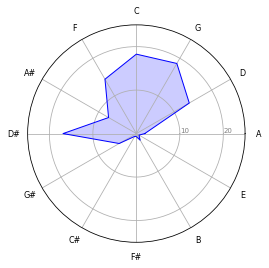

In [13]:
df = pd.DataFrame(d)
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20], ["10","20"], color="grey", size=7)
plt.ylim(0,25)
 
# Plot data
ax.plot(angles, values, 'b', linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'b', alpha=0.2)

plt.savefig('pcpcof2.eps', format='eps')

plt.show()

